# Контекст

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

#### **Полезные Ссылки**
Ссылка на спарсенные данные: 
https://yadi.sk/d/PQIwu741PlaAYw?w=1

Презентация: https://yadi.sk/i/i4ITmK7XvgrXXQ





## План выполнения работ
### [Шаг №1. Загрузите данные и подготовьте их к анализу](#step1)
### [Шаг №2. Анализ данных](#step2)
- ##### [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#step3)
- ##### [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#step4)
- ##### [Для какого вида объекта общественного питания характерно сетевое распространение?](#step5)
- ##### [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step6)
- ##### [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#step7)
- ##### [Выделите в отдельный столбец информацию об улице из столбца address](#step8)
- ##### [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step9)
- ##### [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step10)
- ##### [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step11)

## <a id="step1"> Шаг №1. Загрузите данные и подготовьте их к анализу </a>

### Импортируем библиотеки

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import numpy as np
import warnings 
import seaborn as sns
import requests
from yaml import load, FullLoader
import time
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)

####  Рассмотрим полученные данные rest_data

In [8]:
rest_data = pd.read_csv('/Users/vladimirogulo/PycharmProjects/Praktikum8/rest_data.csv')
#rest_data = pd.read_csv('/datasets/rest_data.csv')

In [9]:
print('\nРассмотрим общую информацию')
rest_data.info()
print('\nВыведем DataFrame на экран')
display(rest_data)
print('\nРассмотрим описательную статистику нашего DataFrame')
rest_data.describe(include='all')


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB

Выведем DataFrame на экран


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36



Рассмотрим описательную статистику нашего DataFrame


,id,object_name,chain,object_type,address,number
count,15366.000000,15366,15366,15366,15366,15366.000000
unique,NaN,10393,2,9,9108,NaN
top,NaN,Столовая,нет,кафе,"город Москва, Ходынский бульвар, дом 4",NaN
freq,NaN,267,12398,6099,95,NaN
mean,119720.066901,NaN,NaN,NaN,NaN,59.547182
std,73036.130732,NaN,NaN,NaN,NaN,74.736833
min,838.000000,NaN,NaN,NaN,NaN,0.000000
25%,28524.000000,NaN,NaN,NaN,NaN,12.000000
50%,144974.500000,NaN,NaN,NaN,NaN,40.000000
75%,184262.250000,NaN,NaN,NaN,NaN,80.000000


##### Описание  данных 

`object_name` — название объекта общественного питания;

`chain` — сетевой ресторан;

`object_type` — тип объекта общественного питания;

`address` — адрес;

`number` — количество посадочных мест.

#### Вывод
Для проверки на дубликаты приведем стобцы к нижнему регистру. Видим, что наибольшеее количество посадочных мест - 1700. Посмотрим повнимательнее на строчки, где количество посадочных мест больше 1000


In [10]:
# приведем строки столбца object_name к нижнему регисту
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [11]:
# Посмотрим, есть ли дубликаты
rest_data.duplicated().sum()

0

In [12]:
# Выведем на экран заведения, где число посадочных мест больше 1000
display(rest_data[rest_data['number']>1000])

,id,object_name,chain,object_type,address,number
2313,26560,ресторан «альфа»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корп...",1040
3686,27026,рум сервис,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,рум сервис,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200
8148,80291,банкетный зал шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,27750,столовая-буфет,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,комбинат питания «управление академсервис»,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
12723,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


In [13]:
# Выведем на экран уникальные типы заведений
display(rest_data['object_type'].unique())

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

#### Вывод
Дубликты не были найдены. Заведения с количеством > 1000 посадочных мест выглядят правдоподобно 

## <a id="step2"> Шаг №2. Анализ данных¶ </a>

#### <a id="step3"> Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.</a>

In [14]:
name_rest = rest_data.groupby('object_type').agg({'id':'count'})

In [15]:
fig = go.Figure(data=[go.Pie(labels=name_rest.index, values=name_rest['id'],hole=0.8)])
fig.update_layout(title="Соотношение типов объектов общественного<br>питания",
    title_x = 0.5,
annotations=[dict(text=('Всего заведений:<br>'+ str(name_rest['id'].sum())), x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

#### Вывод
Большинство заведений(39,7% или 6099) принадлежат категории Кафе. Наименьшее количество заведений в категории Магазин (отдел кулинарии) (1.78 или 273).

#### <a id="step4"> Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.</a>

In [16]:
chain_rest = rest_data.groupby(['chain','object_type']).agg({'id':'count'}).reset_index()

In [17]:
fig = go.Figure(data=[go.Pie(labels=chain_rest['chain'], values=chain_rest['id'],hole=0.8)])
fig.update_layout(title="Соотношение сетевых и несетевых<br>заведений",
    title_x = 0.5,
    #legend_orientation="h",
    annotations=[dict(text='Является ли заведение <br> сетевым?', x=0.5, y=0.5, font_size=20, showarrow=False)],             
                 )

fig.show()

#### Вывод
Подавляющее большинство заведений являются несетевыми. 

#### <a id="step5"> Для какого вида объекта общественного питания характерно сетевое распространение?</a>

<Figure size 576x1440 with 0 Axes>

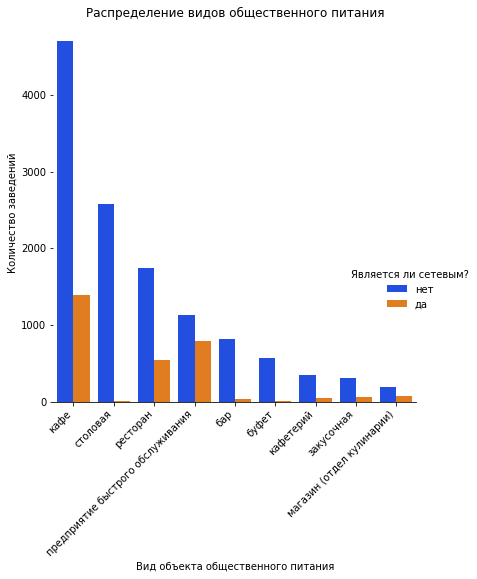

In [18]:
plt.figure(figsize=(8, 20))
g = sns.catplot(x='object_type', y='id', hue='chain',
                data=chain_rest.sort_values(by='id',ascending = False).reset_index(drop=True), 
                height=6, kind="bar",palette="bright")
g.despine(left=True)
g.set_xticklabels(rotation=45,horizontalalignment='right')
g.set(title='Распределение видов общественного питания')
g._legend.set_title('Является ли сетевым?')
g.set(xlabel='Вид объекта общественного питания', ylabel='Количество заведений')

#### Вывод
В группе Кафе имеется большое число сетевых заведений, но если рассматривать долю сетевых к несетевым, то сетевое распределение характерно для предприятий быстрого обслуживания

#### <a id="step6"> Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a>

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

[Text(0, 0.5, 'Количество заведений')]

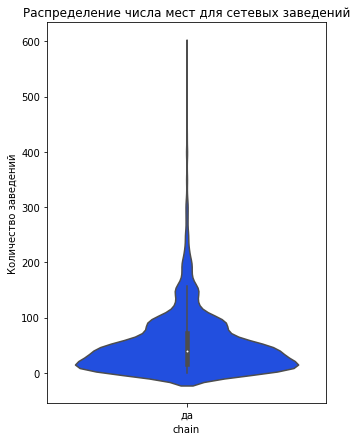

In [19]:
display(rest_data[rest_data['chain']== 'да']['number'].describe())
plt.figure(figsize=(5, 7))
g = sns.violinplot(x="chain", y="number", data=rest_data[rest_data['chain']== 'да'], palette='bright')
g.set(title='Распределение числа мест для сетевых заведений')
g.set(ylabel='Количество заведений')

[Text(0.5, 0, 'Сетевое?'), Text(0, 0.5, 'Количество заведений')]

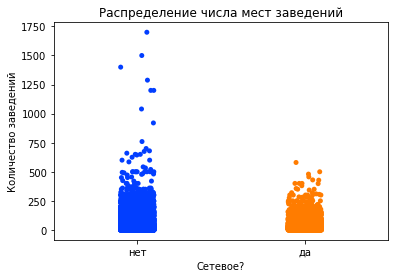

In [20]:
g= sns.stripplot(x="chain", y="number", data=rest_data, palette='bright')
g.set(title='Распределение числа мест заведений')
g.set(xlabel='Сетевое?',ylabel='Количество заведений')

#### Вывод
В большинстве сетевых заведений количество мест варьируется в диапазоне от 15 до 72. В несетевых заведениях количество мест выше, нежели чем в сетевых

#### <a id="step7"> Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.</a>

<Figure size 360x504 with 0 Axes>

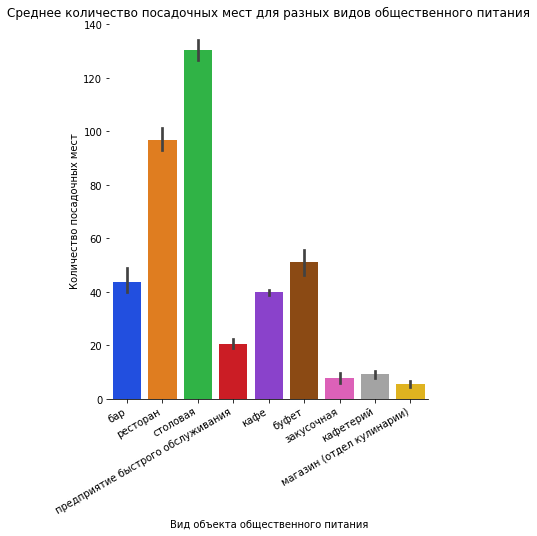

In [21]:
plt.figure(figsize=(5, 7))
g = sns.catplot(x='object_type', y='number', 
                data=rest_data.sort_values(by='number',ascending = False).reset_index(drop=True), 
                height=6, kind="bar",palette="bright")
g.despine(left=True)
g.set_xticklabels(rotation=30,horizontalalignment='right')
g.set(title='Среднее количество посадочных мест для разных видов общественного питания')
g.set(xlabel='Вид объекта общественного питания', ylabel='Количество посадочных мест')

#### Вывод
В среднем больше всего мест предоставляет столовая (около 130 мест). На втором месте - рестораны (95 мест). В магазинах с отделом кулинарии в среднем меньше всего мест и не превышает 10 посадочных мест.

#### <a id="step8"> Выделите в отдельный столбец информацию об улице из столбца address</a>

In [22]:
API_URL = 'https://geocode-maps.yandex.ru/1.x'

In [23]:
config = load(open('/Users/vladimirogulo/PycharmProjects/Config/config.yaml'), Loader=FullLoader)
token = config['yandex_maps']['token']

In [24]:
# Напишем функцию, которая делает запрос адреса через API Яндекс карт и возвращает координаты и улица
# При некорректном ответе на запрос, передаем 'no coordinates' и 'no street'
def make_request_coordinates_steet(address):
    for n in range(4):
        print(f'Адрес {address}. Попытка номер {n+1}')
        try:
            
            params = {
            'geocode': address,
            'format': 'json',
            'apikey': token
            }
            r = requests.get(API_URL, params=params)
            coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
            coordinates = ','.join(coordinates.split(' '))
            street = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['metaDataProperty']['GeocoderMetaData']['AddressDetails']['Country']['AdministrativeArea']['Locality']['Thoroughfare']['ThoroughfareName']
            break
           
        except:
            print('Запрос не удался, пауза {} секунд(ы)'.format(2**(n+1)))
            time.sleep(2**(n+1))
            if  n > 2:
                coordinates = 'no coordinates'
                street = 'no street'
                break
    return pd.Series([coordinates, street])


In [25]:
# Применим функцию к столбцу address
rest_data[['coordinates','street']] = rest_data['address'].apply(make_request_coordinates_steet)
# Функция отработала приблизительно за 5-6 часов

Адрес город Москва, улица Егора Абакумова, дом 9. Попытка номер 1
Адрес город Москва, улица Талалихина, дом 2/1, корпус 1. Попытка номер 1
Адрес город Москва, Абельмановская улица, дом 6. Попытка номер 1
Адрес город Москва, Абрамцевская улица, дом 1. Попытка номер 1
Адрес город Москва, Абрамцевская улица, дом 9, корпус 1. Попытка номер 1
Адрес город Москва, Абрамцевская улица, дом 15, корпус 1. Попытка номер 1
Адрес город Москва, переулок Сивцев Вражек, дом 6/2. Попытка номер 1
Адрес город Москва, Авиамоторная улица, дом 8, строение 1. Попытка номер 1
Адрес город Москва, Авиамоторная улица, дом 8, строение 1. Попытка номер 1
Адрес город Москва, Авиамоторная улица, дом 8, строение 1. Попытка номер 1
Адрес город Москва, Авиамоторная улица, дом 47. Попытка номер 1
Адрес город Москва, Авиамоторная улица, дом 49/1. Попытка номер 1
Адрес город Москва, Авиамоторная улица, дом 51. Попытка номер 1
Адрес город Москва, улица Авиаторов, дом 14. Попытка номер 1
Адрес город Москва, улица Авиаторов, 

In [20]:
# Запишем полученные данные в файл 
#rest_data.to_csv('rest_data_coordinates_steet.csv')

In [21]:
rest_data = pd.read_csv('rest_data_coordinates_steet.csv')

In [22]:
# Запишем в новый датафрейм те данные, где не смогли спарсить улицу
rest_data_no_street = rest_data[rest_data['street']== 'no street']

In [23]:
# Удалим строчки, отдельно с ними поработаем. После снова соединим
rest_data = rest_data.drop(rest_data_no_street.index)

In [24]:
# Запишем в столбец address_list список фраз разделенных запятой
rest_data_no_street['address_list'] = rest_data_no_street['address'].str.split(',')
# Выведем уникальные первые знаяения списков на экран
display(rest_data_no_street['address'].str.split(',').str.get(0).unique())

array(['город Москва', 'Партизанская улица', 'Нижний Таганский тупик',
       'поселение Сосенское', 'Полевая улица', 'поселение Марушкинское',
       'поселение Михайлово-Ярцевское', 'город Московский',
       'город Троицк', 'поселение "Мосрентген"'], dtype=object)

In [25]:
# Сформируем список городов, где будем брать значения следующего элемента
cities = ['город Москва','город Московский','поселение Сосенское','поселение Марушкинское',
          'поселение Михайлово-Ярцевское','город Троицк','поселение "Мосрентген"']
def street_tracker(address_list):
    street = ''
    for city in cities:
        if city in address_list:
            street = address_list[1]
            break
        else:
            street = address_list[0]
    return street

In [26]:
# Применим функцию к столбцу address_list
rest_data_no_street['street'] = rest_data_no_street['address_list'].apply(street_tracker)
# Посмотрим что осталось 
rest_data_no_street[rest_data_no_street['street']=='no street']['address']

Series([], Name: address, dtype: object)

In [27]:
# Соединим датасеты 
rest_data = pd.concat([rest_data, rest_data_no_street])

In [28]:
rest_data.head()

,Unnamed: 0,id,object_name,chain,object_type,address,number,coordinates,street,address_list
0,0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,"37.714474,55.879005",улица Егора Абакумова,NaN
1,1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,"37.673295,55.738307",улица Талалихина,NaN
2,2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,"37.669576,55.735571",Абельмановская улица,NaN
3,3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,"37.573007,55.892713",Абрамцевская улица,NaN
4,4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,"37.572279,55.904074",Абрамцевская улица,NaN


#### Вывод
С помощью запросов к API Яндекс.Карт для большинства адресов получили координаты и адреса. Для тех заведений,  улицы/координты которых через API получить не удалось, мы с выделили улицу, разделив адрес по знаку ",".

#### <a id="step9"> Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?</a>

In [29]:
# Собрем топ-10 улиц в новый датафрейм
street_top_10 = rest_data.groupby('street').agg({'id':'count'}).sort_values(by='id',ascending = False).head(10).reset_index()

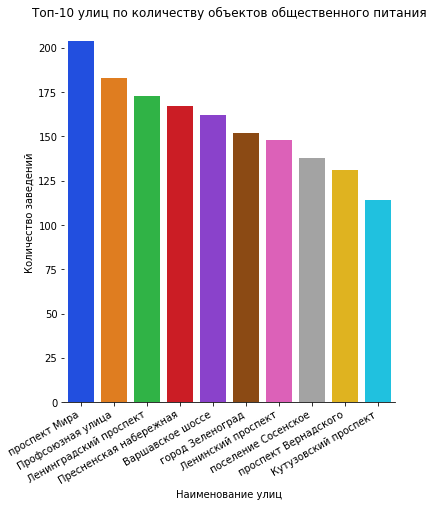

In [30]:
g = sns.catplot(x='street', y='id', 
                data=street_top_10, height=6, kind="bar",palette="bright")
g.despine(left=True)
g.set_xticklabels(rotation=30,horizontalalignment='right')
g.set(title='Топ-10 улиц по количеству объектов общественного питания')
g.set(xlabel='Наименование улиц', ylabel='Количество заведений')

In [31]:
rest_top_10 = rest_data[rest_data['street'].isin(street_top_10['street'])]

In [32]:
# Напишем функцию, которая делает запрос адреса через API Яндекс карт и возвращает район
def make_request_region(coordinates):
    for n in range(3):
        if coordinates == 'no coordinates':
            region = 'no_region'
            break
        else:
            print(f'Координаты {coordinates}. Попытка номер {n+1}')
            try:

                params2 = {
                'geocode': coordinates,
                'format': 'json',
                'apikey': token
                }
                r = requests.get(API_URL, params=params2)
                r.json()
                region = r.json()['response']['GeoObjectCollection']['featureMember'][2]['GeoObject']['metaDataProperty']['GeocoderMetaData']['AddressDetails']['Country']['AdministrativeArea']['Locality']['DependentLocality']['DependentLocality']['DependentLocalityName']
                break

            except:
                print('Запрос не удался, пауза {} секунд(ы)'.format(2**(n+1)))
                time.sleep(2**(n+1))
                if  n > 1:
                    region = 'no_region'
                    break
    return pd.Series([region])

In [33]:
#rest_top_10['region'] = rest_top_10['coordinates'].apply(make_request_region)

In [34]:
#rest_top_10.to_csv('rest_top_10.csv')
rest_top_10 = pd.read_csv('rest_top_10.csv')

In [35]:
rest_top_10.head()

,Unnamed: 0,Unnamed: 0.1,id,object_name,chain,object_type,address,number,coordinates,street,address_list,region
0,151,151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,"37.619683,55.699943",Варшавское шоссе,NaN,Донской район
1,152,152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,"37.622405,55.700877",Варшавское шоссе,NaN,Донской район
2,153,153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,"37.622432,55.693226",Варшавское шоссе,NaN,Донской район
3,154,154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,"37.618758,55.656869",Варшавское шоссе,NaN,Нагорный район
4,155,155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,"37.618812,55.646228",Варшавское шоссе,NaN,Нагорный район


In [36]:
rest_top_10.loc[rest_top_10['region']=='no_region','region'] = rest_top_10.loc[rest_top_10['region']=='no_region','street'].values

In [37]:
rest_top_10['region'].unique()

array(['Донской район', 'Нагорный район', 'район Чертаново Южное',
       'Гагаринский район', 'Ломоносовский район',
       'район Проспект Вернадского', 'район Тропарёво-Никулино',
       'район Фили-Давыдково', 'район Дорогомилово', 'район Беговой',
       'район Аэропорт', 'район Сокол', 'район Якиманка',
       'Обручевский район', 'Мещанский район', 'Останкинский район',
       'Алексеевский район', 'Академический район', 'Профсоюзная улица',
       'район Черёмушки', 'район Коньково', 'район Тёплый Стан',
       'район Чертаново Северное', 'район Чертаново Центральное',
       'Хорошёвский район', 'район Нагатино-Садовники', 'район Ростокино',
       'проспект Вернадского', 'проспект Мира', 'район Свиблово',
       'район Ясенево', 'район Южное Бутово', 'район Раменки',
       'Ленинградский проспект', 'Пресненский район', 'Ярославский район',
       ' город Зеленоград', ' поселение Сосенское'], dtype=object)

In [38]:
group_rest_top_10 = rest_top_10.groupby('region').agg({'id':'count'}).sort_values(by='id',ascending = False).head(10).reset_index()

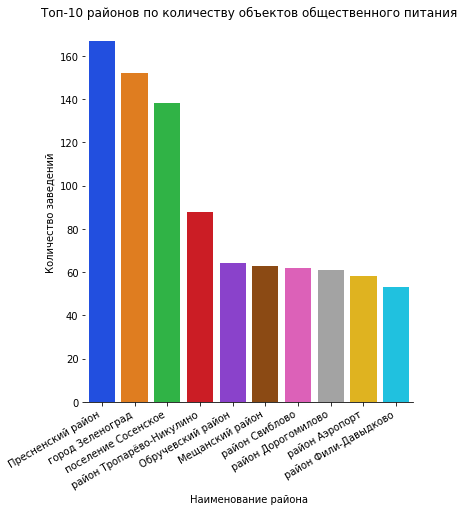

In [39]:
g = sns.catplot(x='region', y='id', 
                data=group_rest_top_10, height=6, kind="bar",palette="bright")
g.despine(left=True)
g.set_xticklabels(rotation=30,horizontalalignment='right')
g.set(title='Топ-10 районов по количеству объектов общественного питания')
g.set(xlabel='Наименование района', ylabel='Количество заведений')

#### Вывод
Больше всего заведений (204) располагаются на проспекте Мира. Далее идут профсоюзная улица и Ленинградский проспект. Кутузовский проспект замыкает Топ-10 по количеству помещений. Так как мы имеем топ-10 не только популярных, но и длинных улиц, то сложно сделать вывод по определенному району. Мы снова вернулись к API Яндекс карт, чтобы точно выявить районы, к которым принадлежат эти адреса. Самым популярным районом стал - Пресненский район

#### <a id="step10"> Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?</a>

In [40]:
street_min_rest = rest_data.groupby('street').agg({'id':'count','coordinates':'first','address':'first'}).sort_values(by='id',ascending = False).reset_index()

In [41]:
street_one_rest = street_min_rest[street_min_rest['id'] == 1]

In [42]:
print('Число улиц с одним объектом общественного питания:',street_one_rest.shape[0])

Число улиц с одним объектом общественного питания: 553


In [43]:
#  Применим функцию
#street_one_rest['region'] = street_one_rest['coordinates'].apply(make_request_region)

In [44]:
#street_one_rest.to_csv('street_one_rest.csv')
street_one_rest = pd.read_csv('street_one_rest.csv')

In [45]:
display(street_one_rest['region'].value_counts(sort=True,ascending= True))

район Чертаново Северное      1
район Восточное Измайлово     1
район Перово                  1
район Ивановское              1
район Западное Дегунино       1
                             ..
Тверской район               19
Пресненский район            20
Таганский район              26
район Хамовники              26
no_region                    51
Name: region, Length: 101, dtype: int64

In [46]:
# Получим список районов с одним заведением общественного питания
region = street_one_rest['region'].value_counts(sort=True,ascending= True).reset_index()
region.columns= ['region', 'count']
region_one_rest = region[region['count'] == 1]
display(region_one_rest)

,region,count
0,район Чертаново Северное,1
1,район Восточное Измайлово,1
2,район Перово,1
3,район Ивановское,1
4,район Западное Дегунино,1
5,Молжаниновский район,1
6,район Марфино,1
7,Войковский район,1
8,район Левобережный,1
9,район Филёвский Парк,1


In [47]:
# Рассмотрим те адреса, где район получить не удалось
display(street_min_rest[street_min_rest['coordinates']=='no coordinates'].tail(25))

,street,id,coordinates,address
1431,деревня Столбово,1,no coordinates,"поселение Сосенское, деревня Столбово, дом 1"
1432,деревня Сенькино-Секерино,1,no coordinates,"поселение Михайлово-Ярцевское, деревня Сенькин..."
1433,деревня Дудкино,1,no coordinates,"поселение ""Мосрентген"", деревня Дудкино, владе..."
1434,деревня Давыдково,1,no coordinates,"поселение Марушкинское, деревня Давыдково, дом..."
1442,Автомобильный проезд,1,no coordinates,"город Москва, Автомобильный проезд, дом 6, стр..."
1448,посёлок Акулово,1,no coordinates,"город Москва, посёлок Акулово, дом 43А, строен..."
1455,поселение Филимонковское,1,no coordinates,"город Москва, поселение Филимонковское, деревн..."
1469,31-й километр Московской Кольцевой Автодороги,1,no coordinates,"город Москва, 31-й километр Московской Кольцев..."
1473,30-й километр Московской Кольцевой Автодороги,1,no coordinates,"город Москва, 30-й километр Московской Кольцев..."
1478,26-й километр Московской Кольцевой Автодороги,1,no coordinates,"город Москва, 26-й километр Московской Кольцев..."


#### Вывод
В нашем датасете мы имеем 553 улицы с одним заведением общественного питания. Если же рассматривать районы, то мы имеем как минимум 23 района, где предприниматели/рестораторы не видят потенциала. Также мы получили список адресов, где мы не смогли получить район. Большая часть из них находится на МКАД

#### <a id="step11"> Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?</a>

In [48]:
top_rest = rest_top_10['street'].unique()

In [49]:
for rest in top_rest:
    print(rest)
    display(rest_top_10[rest_top_10['street'] == rest]['number'].describe())
    

Варшавское шоссе


count    162.000000
mean      52.672840
std       74.905807
min        0.000000
25%        8.000000
50%       30.000000
75%       64.000000
max      500.000000
Name: number, dtype: float64

проспект Вернадского


count     131.000000
mean       66.167939
std       121.982165
min         0.000000
25%        20.000000
50%        40.000000
75%        80.000000
max      1288.000000
Name: number, dtype: float64

Кутузовский проспект


count     114.000000
mean       85.061404
std       194.464196
min         0.000000
25%        20.000000
50%        40.000000
75%        96.000000
max      1700.000000
Name: number, dtype: float64

Ленинградский проспект


count    173.000000
mean      52.265896
std       62.939883
min        0.000000
25%       15.000000
50%       40.000000
75%       70.000000
max      625.000000
Name: number, dtype: float64

Ленинский проспект


count    148.000000
mean      63.148649
std       67.850412
min        0.000000
25%       20.000000
50%       45.000000
75%       80.000000
max      495.000000
Name: number, dtype: float64

проспект Мира


count    204.000000
mean      62.696078
std       58.972447
min        0.000000
25%       20.000000
50%       46.500000
75%       90.000000
max      326.000000
Name: number, dtype: float64

Профсоюзная улица


count    183.000000
mean      47.360656
std       57.443532
min        0.000000
25%        5.000000
50%       24.000000
75%       67.500000
max      240.000000
Name: number, dtype: float64

Пресненская набережная


count    167.000000
mean      45.844311
std       65.316834
min        0.000000
25%        8.500000
50%       30.000000
75%       50.000000
max      478.000000
Name: number, dtype: float64

 город Зеленоград


count    152.000000
mean      77.309211
std       64.155877
min        0.000000
25%       23.750000
50%       60.000000
75%      120.000000
max      290.000000
Name: number, dtype: float64

 поселение Сосенское


count    138.000000
mean      22.550725
std       33.307695
min        0.000000
25%        5.000000
50%       15.000000
75%       25.000000
max      200.000000
Name: number, dtype: float64

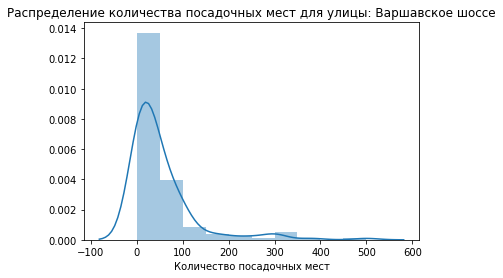

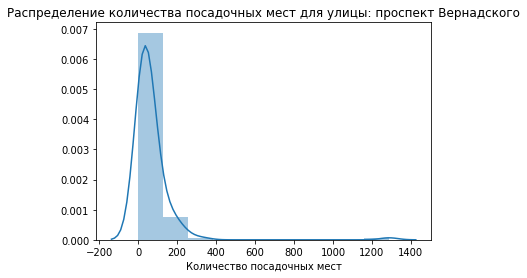

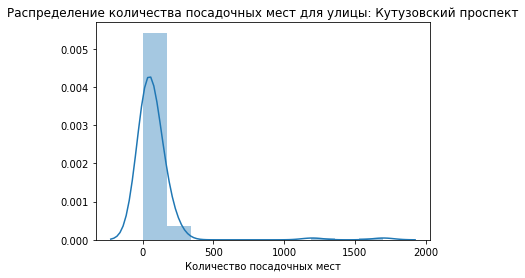

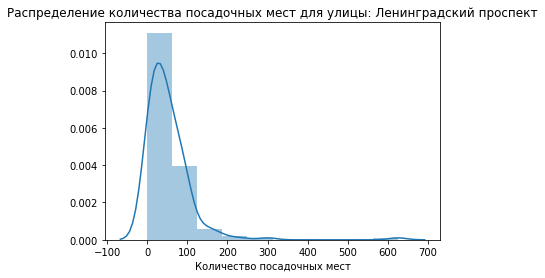

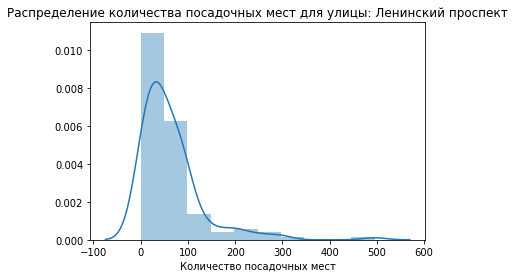

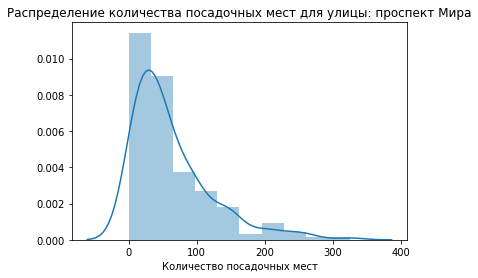

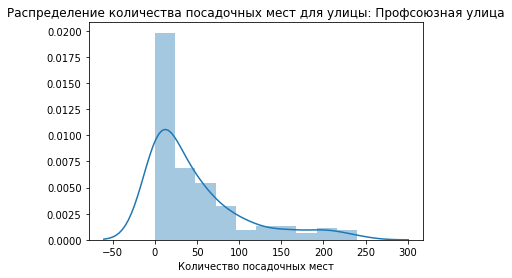

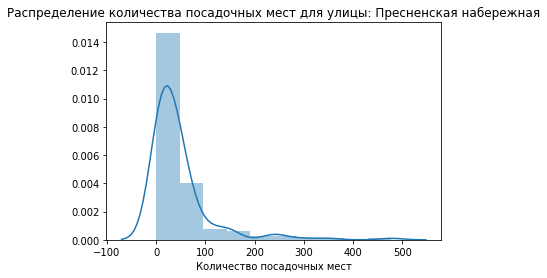

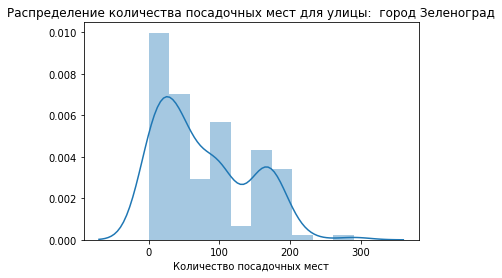

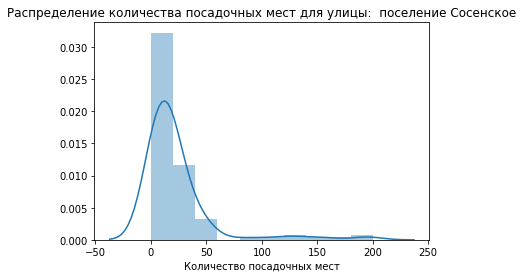

In [50]:
for rest in top_rest:
    g = sns.distplot(rest_top_10[rest_top_10['street'] == rest]['number'], bins=10)
    g.set(title='Распределение количества посадочных мест для улицы: '+rest)
    g.set(xlabel='Количество посадочных мест')
    plt.show()

#### Вывод
Для поселения Сосенское и Пресненской набережной присуще небольшие заведения, с малым количеством посадочных мест (до 50). Во всех остальных случаях количество мест варьируется от 5 до 100 посадочных мест. Также можем увидеть, что на Кутузовском проспекте находится наше самое большое заведение с 1700 местами

### Общий вывод
По  имеющимся у нас данным можно сделать вывод, что предприниматели предпочитают открывать несетевые заведения, в большей степени - Кафе. Несетевые заведения имеют больше посадочных мест, в то время как в сетевых количество мест варьируется от  15 до 72. 

Для формирования общей понимания о размерах в каждой категории, мы построили график среднего количества посадочных мест для каждого вида объекта общественного питания. Из данного графика видно, что по количеству мест лидирует столовые (~130 мест), а в магазинах с кулинарией и закусочных количество мест не превышает 10. Что касается баров и кафе, то мы имеем в среднем 40 посадочных мест.

Для формирования списка улиц, мы воспользовались помощью  API Яндекс карт, с помощью которого мы получили как информацию об улицах, так и районы.

На основании полученных данных мы построили график с топ-10 улицами по кол-во объектов общественного питания, где лидером стала : Проспект Мира. Так как в топ-10 у нас вошли улицы с большой протяженностью, мы нашли районы, где больше всего заведений, в которых  объекты общественного питания расположены на улицах из ТОПа. Первым по популярности стал Пресненский район.

Далее мы решили выявить самые непопулярные районы, где предприниматели не открывают заведения общественного питания. Из имеющего у нас датасета мы получили 553 улицы или 23 района. 

Для популярных улиц мы решили построить распределение по количеству посадочных мест. Для поселения Сосенское и Пресненской набережной присуще небольшие заведения. В остальных же районах мы имеем заведения в основном от 5 до 100 посадочных мест. 

Исходя из конкретного анализа, можно сделать вывод, что Кафе с 30-60 посадочными местами пользуются больше спросом. Если рассматривать Москву, то лучше обратить внимание на Пресненский, р-н Тропарево-Никулино, Обручевский р-н, где мы имеем больше количество заведений. 
